In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomZoom, RandomTranslation, Resizing, RandomContrast
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import load_model

model = load_model('cnn_model_combo.h5')

Test on MNIST test and val

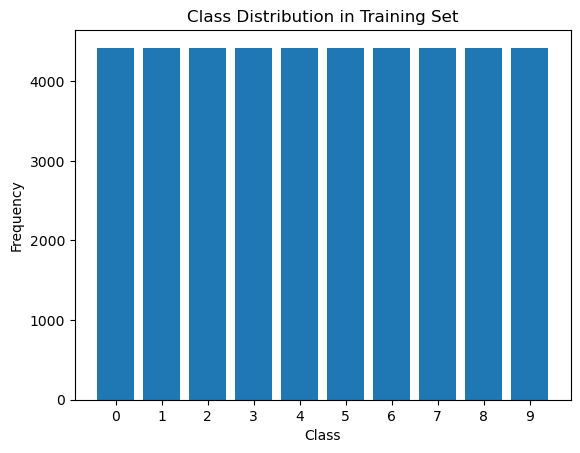

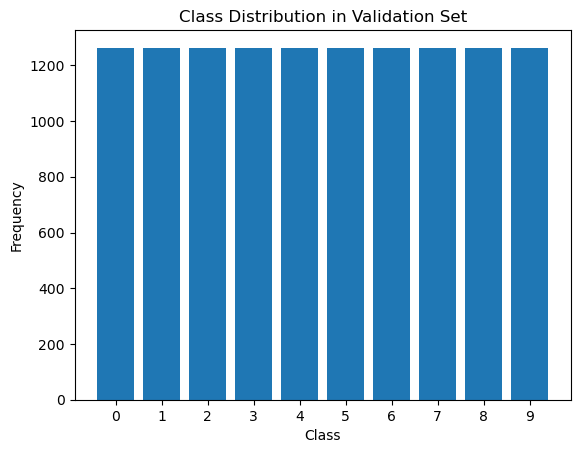

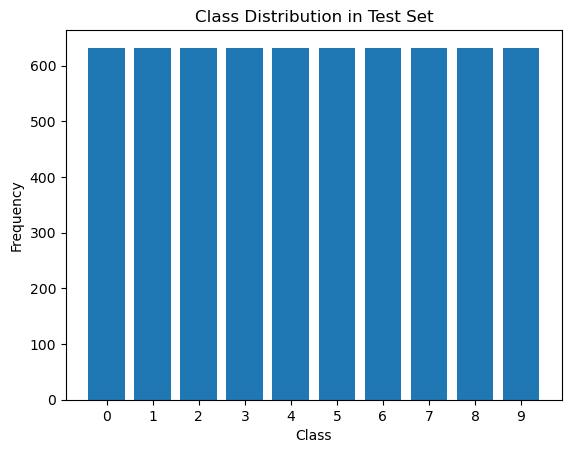

((44191, 10), (12626, 10), (6313, 10))

In [3]:
# Load MNIST data
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
# x_train_full: 60,000 images of 28x28 pixels
# y_train_full: 60,000 labels (0-9)
# x_test: 10,000 images of 28x28 pixels
# y_test: 10,000 labels (0-9)

# Normalize the images to [0, 1]
x_train_full = x_train_full.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

# Flatten y_train_full and y_test to work with non-categorical labels temporarily
y_train_full_flat = np.argmax(y_train_full, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

# Combine datasets to balance them together
x_combined = np.concatenate((x_train_full, x_test))
y_combined_flat = np.concatenate((y_train_full_flat, y_test_flat))

# Determine the minimum class size
min_class_size = min(np.bincount(y_combined_flat))

# Create a balanced dataset
x_balanced = np.empty((0, 28, 28))
y_balanced_flat = np.empty(0, dtype=int)
for i in range(10):
    indices = np.where(y_combined_flat == i)[0]
    balanced_indices = np.random.choice(indices, min_class_size, replace=False)
    x_balanced = np.vstack((x_balanced, x_combined[balanced_indices]))
    y_balanced_flat = np.concatenate((y_balanced_flat, y_combined_flat[balanced_indices]))

# Convert labels back to categorical
y_balanced = to_categorical(y_balanced_flat, 10)

# Split the balanced dataset into training (70%), validation (20%), and test (10%)
x_temp, x_test, y_temp, y_test = train_test_split(x_balanced, y_balanced, test_size=0.1, stratify=y_balanced_flat)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=(2/9), stratify=y_temp)

# Normalise the images to [0, 1]
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to add a dimension for the channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Function to plot class distribution
def plot_class_distribution(labels, dataset_name):
    # Count the number of each class
    class_counts = np.sum(labels, axis=0)
    # Plot
    plt.bar(range(10), class_counts)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(f'Class Distribution in {dataset_name} Set')
    plt.xticks(range(10))
    plt.show()

# Plot the class distribution for each set
plot_class_distribution(y_train, 'Training')
plot_class_distribution(y_val, 'Validation')
plot_class_distribution(y_test, 'Test')
y_train.shape, y_val.shape, y_test.shape

In [13]:
# TEST ON MNIST ONLY

# Reshape the images to add a dimension for the channel
x_val = x_val.reshape(-1, 28, 28, 1)
y_val = y_val

# Reshape the images to add a dimension for the channel
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = y_test

x_test.shape, x_val.shape

((6313, 28, 28, 1), (12626, 28, 28, 1))

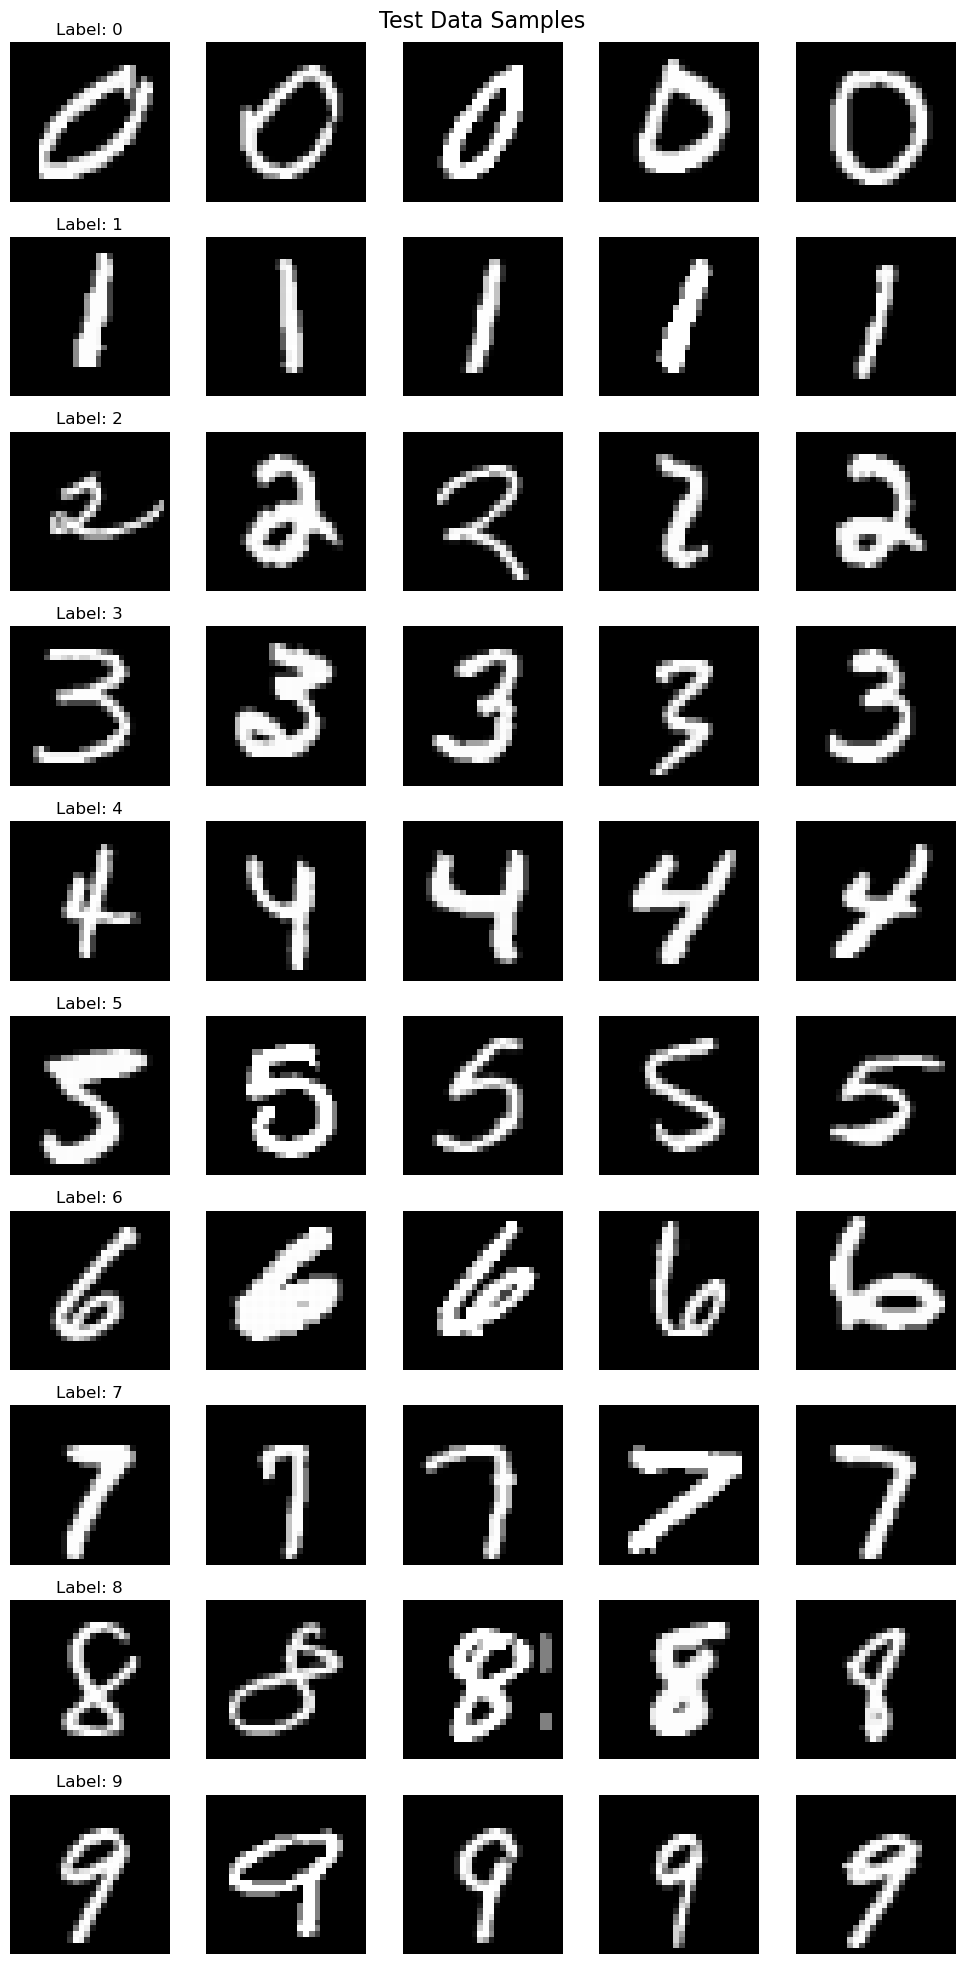

In [17]:
# Check the training and validation data are accurate

def plot_images_with_labels(images, labels, num_classes=10, title="Data", samples_per_class=5):
    fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(2*samples_per_class, 2*num_classes))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()
    
    for i in range(num_classes):
        # Find images of a specific class
        class_images = images[labels == i][:samples_per_class]
        
        for j, img in enumerate(class_images):
            idx = i * samples_per_class + j
            axes[idx].imshow(img.reshape(28, 28), cmap='gray')
            axes[idx].axis('off')
            if j == 0:
                axes[idx].set_title(f'Label: {i}')
    plt.tight_layout()
    plt.show()

# Assuming you have y_train_combined and y_test_combined as one-hot encoded labels
y_test_cat = np.argmax(y_val, axis=1)

# Plot training data samples
# plot_images_with_labels(x_train_combined, y_train_combined_categorical, title="Training Data Samples")
# print('y')
# plot_images_with_labels(x_val_combined, y_val_combined_categorical, title="Validation Data Samples")
plot_images_with_labels(x_val, y_test_cat, title="Test Data Samples")

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes with the model
test_predictions = model.predict(x_val)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(y_val, axis=1)

# Confusion Matrix
print(confusion_matrix(test_true_classes, test_pred_classes))

# Classification Report
print(classification_report(test_true_classes, test_pred_classes))

395/395 [==============================] - 1s 2ms/step
[[1262    0    0    0    0    0    1    0    0    0]
 [   0 1257    3    0    0    0    1    1    0    0]
 [   1    0 1255    2    1    0    0    3    0    0]
 [   1    1    2 1253    0    1    0    1    3    0]
 [   0    0    0    0 1260    0    1    0    1    1]
 [   2    0    1    3    0 1247    7    0    2    1]
 [   4    0    0    0    0    1 1258    0    0    0]
 [   0    4    3    0    1    0    0 1250    1    3]
 [   1    2    4    0    1    0    4    2 1246    3]
 [   4    0    0    0   13    1    0    2    0 1243]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1263
           1       0.99      1.00      1.00      1262
           2       0.99      0.99      0.99      1262
           3       1.00      0.99      0.99      1262
           4       0.99      1.00      0.99      1263
           5       1.00      0.99      0.99      1263
           6       0.99      1.00  

Test on EMNIST

In [21]:
from emnist import extract_training_samples, extract_test_samples

# Load EMNIST data
emnist_images, emnist_labels = extract_training_samples('digits')
emnist_test_images, emnist_test_labels = extract_test_samples('digits')

# Normalize the images to [0, 1]
emnist_images = emnist_images.astype('float32') / 255
emnist_test_images = emnist_test_images.astype('float32') / 255

# Convert labels to one-hot encoding`
# emnist_labels = to_categorical(emnist_labels, 10)
# emnist_test_labels = to_categorical(emnist_test_labels, 10)

# Reshape the images to add a dimension for the channel
emnist_images = emnist_images.reshape(emnist_images.shape[0], 28, 28, 1)
emnist_test_images = emnist_test_images.reshape(emnist_test_images.shape[0], 28, 28, 1)

# Assuming emnist_test_labels is already loaded and is a flat array of labels (not one-hot encoded)
unique_classes = np.unique(emnist_test_labels)
sample_per_class = 2400
balanced_indices = []
for cls in unique_classes:
    cls_indices = np.where(emnist_test_labels == cls)[0]
    cls_sample_indices = np.random.choice(cls_indices, sample_per_class, replace=False)
    balanced_indices.extend(cls_sample_indices)

# Now, extract the images and labels using the indices
emnist_x_balanced = emnist_test_images[balanced_indices]
emnist_y_balanced = emnist_test_labels[balanced_indices]
# emnist_x_balanced.shape, emnist_y_balanced.shape

# Normalize, reshape, and convert labels to one-hot encoding as necessary
emnist_x_balanced = emnist_x_balanced.astype('float32') / 255
emnist_x_balanced = emnist_x_balanced.reshape(-1, 28, 28, 1)
# emnist_y_balanced_one_hot = to_categorical(emnist_y_balanced, 10)

# Split the balanced dataset into training (70%), validation (20%), and test (10%)
ex_temp, ex_test, ey_temp, ey_test = train_test_split(emnist_x_balanced, emnist_y_balanced, test_size=0.1, stratify=emnist_y_balanced)
ex_train, ex_val, ey_train, ey_val = train_test_split(ex_temp, ey_temp, test_size=(4/9), stratify=ey_temp)

# Reshape the images to add a dimension for the channel
ex_train_combined = ex_train.reshape(-1, 28, 28, 1)
ex_val_combined = ex_val.reshape(-1, 28, 28, 1)
ex_test_combined = ex_test.reshape(-1, 28, 28, 1)

ey_train_combined = ey_train
ey_val_combined = ey_val
ey_test_combined = ey_test

ex_train_combined.shape, ex_val_combined.shape, ex_test_combined.shape

((12000, 28, 28, 1), (9600, 28, 28, 1), (2400, 28, 28, 1))

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes with the model
eval_predictions = model.predict(ex_test_combined)
eval_pred_classes = np.argmax(eval_predictions, axis=1)
eval_true_classes = ey_test_combined

# Confusion Matrix
print(confusion_matrix(eval_true_classes, eval_pred_classes))

# Classification Report
print(classification_report(eval_true_classes, eval_pred_classes))

75/75 [==============================] - 0s 2ms/step
[[238   1   0   0   1   0   0   0   0   0]
 [  0 239   0   0   0   0   0   1   0   0]
 [  0   0 235   3   0   0   0   1   1   0]
 [  1   0   1 238   0   0   0   0   0   0]
 [  0   1   0   0 238   0   0   0   0   1]
 [  0   0   0   0   0 237   2   0   1   0]
 [  0   0   0   0   0   0 240   0   0   0]
 [  0   0   0   0   0   0   0 240   0   0]
 [  0   2   0   1   0   0   0   0 235   2]
 [  0   1   0   1   0   0   0   1   0 237]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       240
           1       0.98      1.00      0.99       240
           2       1.00      0.98      0.99       240
           3       0.98      0.99      0.99       240
           4       1.00      0.99      0.99       240
           5       1.00      0.99      0.99       240
           6       0.99      1.00      1.00       240
           7       0.99      1.00      0.99       240
           8       0.99      

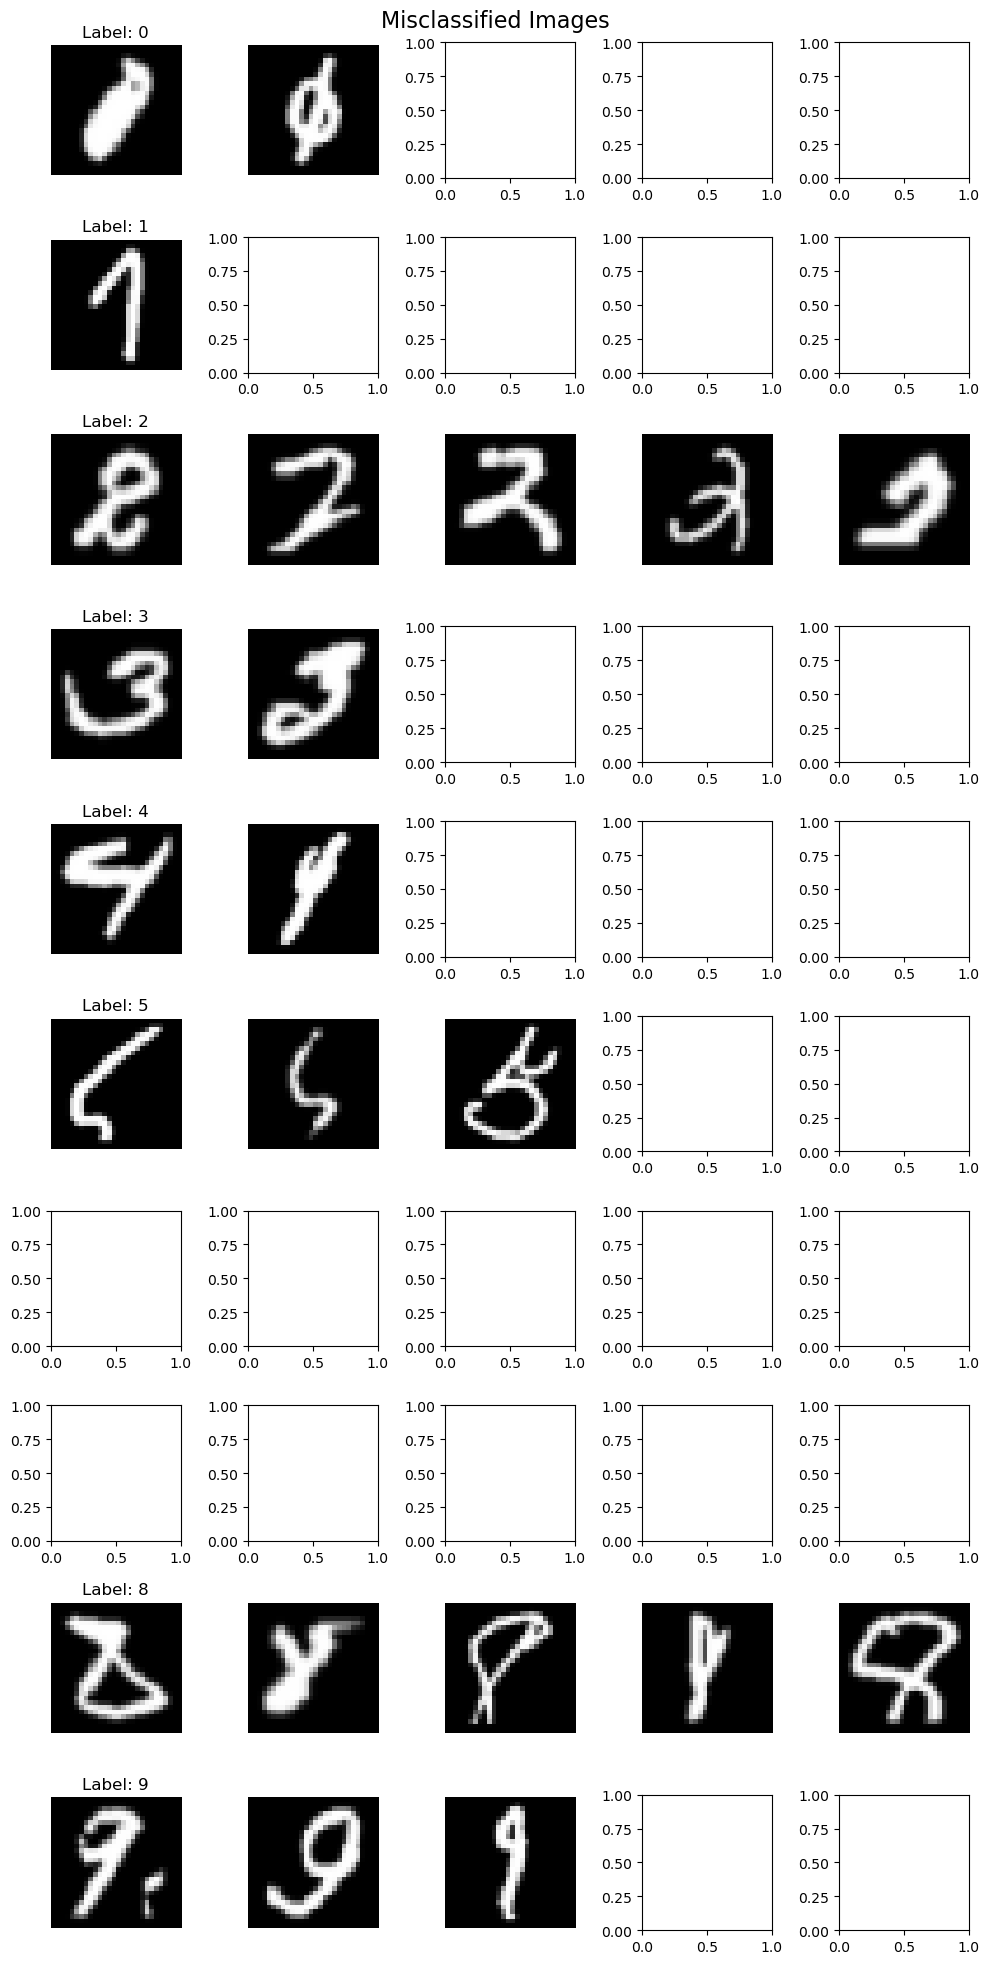

In [26]:
# Visualise the misclassified images
misclassified_indices = np.where(eval_pred_classes != eval_true_classes)[0]
misclassified_images = ex_test_combined[misclassified_indices]
misclassified_labels = eval_true_classes[misclassified_indices]
misclassified_pred = eval_pred_classes[misclassified_indices]

# Plot the misclassified images
plot_images_with_labels(misclassified_images, misclassified_labels, title="Misclassified Images")

In [28]:
net = model

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
    netType='CNN'
else:
    netType='MLP'

netType

'CNN'

In [32]:
#test with MNIST data
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
if netType in ['MLP']:
    x_test = x_test.reshape(10000, 784)
else:
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST=', 100 * correct_classified / labels_test.size)

313/313 [==============================] - 1s 3ms/step
Percentage correctly classified MNIST= 61.85


Terrible news so lets double check

In [37]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1]
x_test = x_test.astype('float32') / 255

# Reshape for CNN input
x_test = x_test.reshape(-1, 28, 28, 1)  # Assuming the model expects images with a channel dimension

# Convert labels to one-hot encoding
y_test = to_categorical(y_test, 10)

import numpy as np

# Add random noise to the test set
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)  # Clip the values to be between 0 and 1

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred))

# Load your model
model = model # Adjust path as needed

# Evaluate on the original test set
print("Evaluating on the original test set:")
evaluate_model(model, x_test, y_test)

# Evaluate on the noisy test set
print("Evaluating on the noisy test set:")
evaluate_model(model, x_test_noisy, y_test)

Evaluating on the original test set:
313/313 [==============================] - 1s 2ms/step
Accuracy: 61.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       1.00      0.14      0.24      1135
           2       0.80      0.90      0.85      1032
           3       0.87      0.85      0.86      1010
           4       0.99      0.61      0.76       982
           5       0.99      0.09      0.17       892
           6       0.98      0.91      0.95       958
           7       1.00      0.08      0.16      1028
           8       0.24      1.00      0.38       974
           9       0.72      0.66      0.69      1009

    accuracy                           0.62     10000
   macro avg       0.86      0.62      0.60     10000
weighted avg       0.86      0.62      0.60     10000

Evaluating on the noisy test set:
313/313 [==============================] - 1s 2ms/step
Accuracy: 9.74%
Clas

/Users/oscarmoxon/anaconda3/envs/NN/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oscarmoxon/anaconda3/envs/NN/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oscarmoxon/anaconda3/envs/NN/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le